# Code for Naive Bayes model for subway opinion tweet data

Some segments of code partially adapted from Professor James Hickman's Wikipedia Crawler Example

In [135]:
# Import relevant packages
import pandas as pd
import numpy as np
import nltk
import os
import re
import math
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('words')
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\alexp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [136]:
# Read in unvectorized Opinion Tweet Data
df = pd.read_csv("../../data/01-modified-data/NYCT-Opinion-Tweets-Sentiments.csv")
df = df[df['category']!="neu"]

## Data Reformatting for Model Construction

In [137]:
# Convert df to list of strings
corpus = df['text'].tolist()

# Assign numerical codes to categories
df['category'] = pd.Categorical(df['category'])
df['label'] = df['category'].cat.codes
y1 = df['label'].to_numpy()
labels = ['neg','pos']

In [138]:
# Vectorize corpus text
vec = CountVectorizer(min_df=0.001)
all_x = vec.fit_transform(corpus)
X=np.array(all_x.todense())

# one hot encoding
max_x=np.max(X,axis=0)
X=np.ceil(X/max_x)

## Separate into train and test

In [139]:
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

## Define reporting functions

In [140]:
def accuracy_report(y,ypred):
    print("Prediction ccuracy:",accuracy_score(y, ypred)*100)
    print("Mislabeled Points:")


def model_predict(model):
    # make predictions on given test set based on training set
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # Print accuracy
    print("Training Set:")
    accuracy_report(y_train,yp_train)
    print("First 30 predictions on trained set")
    print(y_train[0:30])
    print(yp_train[0:30])
    print("Errors:",yp_train[0:30]-y_train[0:30])

    # Print accuracy
    print("Test Set:")
    accuracy_report(y_test,yp_test)
    print("First 30 predictions on test set")
    print(y_test[0:30])
    print(yp_test[0:30])
    print("Errors:",yp_test[0:30]-y_test[0:30])

## Model Construction

In [141]:
# Initialize and fit model
model = MultinomialNB()
model.fit(x_train,y_train)

model_predict(model)

Training Set:
Prediction ccuracy: 99.47916666666666
Mislabeled Points:
First 30 predictions on trained set
[1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
[1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
Errors: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test Set:
Prediction ccuracy: 84.5360824742268
Mislabeled Points:
First 30 predictions on test set
[1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1]
[1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1]
Errors: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


## Plots

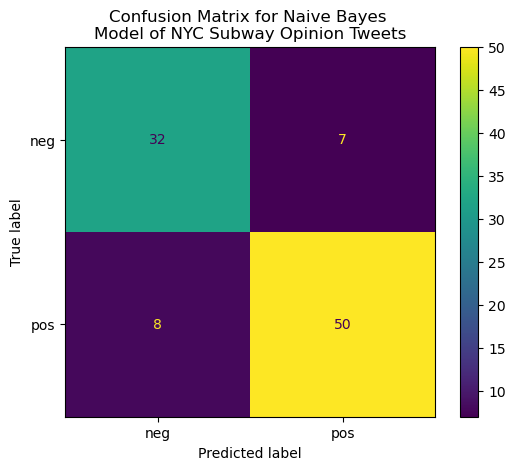

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test,model.predict(x_test),labels=model.classes_)
cm_plot = ConfusionMatrixDisplay(cm,display_labels=labels)
cm_plot.plot()
plt.title("Confusion Matrix for Naive Bayes \nModel of NYC Subway Opinion Tweets")
plt.savefig("../../501-project-website/images/CONFUSION-MX-Opinion-Tweets.png")

--------TRAINING DATA-------


ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

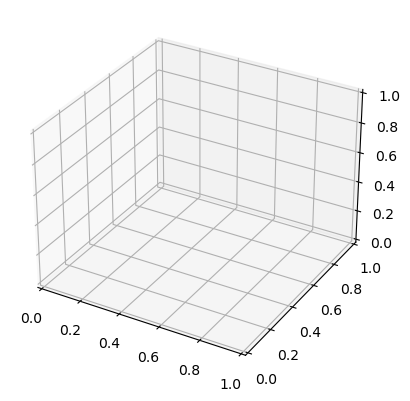